<a href="https://colab.research.google.com/github/dariamm03/Machine_Learning/blob/main/MachineLearning9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание
Исследовать данные на наличие ассоциативных правил алгоритмом Apriori. Подобрать значения Support (поддержка) и Confidence (уверенность). Интерпретировать полученные результаты.

In [ ]:
pip install apyori

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from apyori import apriori

In [ ]:
data = pd.read_csv('Dataset9_2.csv', sep=',', on_bad_lines='skip') #статистика продаж легковых автомобилей
data.head(8)

,Id,Price,Year,Mileage,City,State,Vin,Make,Model
0,1,16472,2015,18681,Jefferson City,MO,KL4CJBSBXFB267643,Buick,EncoreConvenience
1,2,15749,2015,27592,Highland,IN,KL4CJASB5FB245057,Buick,EncoreFWD
2,3,16998,2015,13650,Boone,NC,KL4CJCSB0FB264921,Buick,EncoreLeather
3,4,15777,2015,25195,New Orleans,LA,KL4CJASB4FB217542,Buick,EncoreFWD
4,5,16784,2015,22800,Las Vegas,NV,KL4CJBSB3FB166881,Buick,EncoreConvenience
5,6,17020,2016,16877,Grand Island,NY,KL4CJASB7GB536760,Buick,EncoreFWD
6,7,15950,2015,27885,West Covina,CA,KL4CJASB3FB241802,Buick,EncoreFWD
7,8,17091,2016,24008,Little Rock,AR,KL4CJASBXGB565542,Buick,EncoreFWD


In [ ]:
data = data.astype(str)
data['Make + Model'] = data['Make'] + ' ' + data['Model']
data['City + State'] = data['City'] + ' ' + data['State']
data.drop(['Make', 'Model', 'Vin', 'City', 'State', 'Id'], axis=1, inplace=True)
transactions = data.values.tolist()
data.head(8)

,Price,Year,Mileage,Make + Model,City + State
0,16472,2015,18681,Buick EncoreConvenience,Jefferson City MO
1,15749,2015,27592,Buick EncoreFWD,Highland IN
2,16998,2015,13650,Buick EncoreLeather,Boone NC
3,15777,2015,25195,Buick EncoreFWD,New Orleans LA
4,16784,2015,22800,Buick EncoreConvenience,Las Vegas NV
5,17020,2016,16877,Buick EncoreFWD,Grand Island NY
6,15950,2015,27885,Buick EncoreFWD,West Covina CA
7,17091,2016,24008,Buick EncoreFWD,Little Rock AR


In [ ]:
rules = apriori(transactions=transactions, min_support=0.001, min_confidence=0.001, min_lift=1.1, min_length=2, max_length=2)
results = list(rules)

In [ ]:
def inspect(results):
  lhs = [tuple(result[2][0][0])[0] for result in results]
  rhs = [tuple(result[2][0][1])[0] for result in results]
  supports = [result[1] for result in results] #частота встречания пар элементов в датасете
  confidences = [result[2][0][2] for result in results] #вероятность того, что 2ой элемент встретится после 1го
  lifts = [result[2][0][3] for result in results] #отношение поддержки и уверенности; на сколько 2ой зависит от 1го
  return list(zip(lhs, rhs, supports, confidences, lifts))

resultsinDataFrame = pd.DataFrame(inspect(results), columns=['left hand side', 'right hand side', 'Support', 'Confidence', 'Lift'])
resultsinDataFrame = resultsinDataFrame.nlargest(n = 10, columns='Lift')

resultsinDataFrame
#соответствия после применения алгоритма

,left hand side,right hand side,Support,Confidence,Lift
5,2013,Nissan AltimaSedan,0.001399,0.016331,11.669913
2,2013,Ford F-150SuperCrew,0.001972,0.023018,11.660192
118,2017,Ram 1500SLT,0.001306,0.011164,8.529265
117,2017,Mercedes-Benz C-ClassC,0.001482,0.012676,8.378805
102,2017,Chevrolet MalibuLT,0.005041,0.043104,7.271102
1,2011,Hyundai Sonata4dr,0.001034,0.021953,6.763032
101,2017,Chevrolet CruzeSedan,0.002917,0.024944,6.737299
67,2016,Chevrolet Cruze,0.002089,0.013437,6.431578
68,2016,Chevrolet Malibu,0.001386,0.008916,6.047764
115,2017,Kia SedonaLX,0.001329,0.011361,5.798578


In [ ]:
data_10_best = resultsinDataFrame[:10]

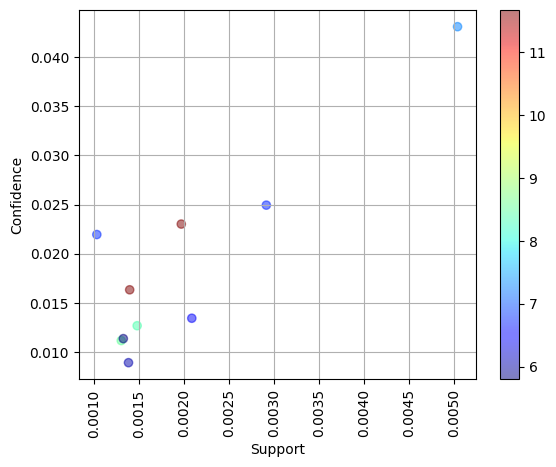

In [ ]:
plt.scatter(x=data_10_best['Support'], y=data_10_best['Confidence'], c=data_10_best['Lift'], cmap='jet', alpha=0.5)
plt.xlabel('Support')
plt.xticks(rotation=90)
plt.ylabel('Confidence')
plt.grid()
plt.colorbar()

plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter(data_10_best, x='Support', y='Confidence', color='Lift')
fig.show()

In [ ]:
import plotly.express as px
fig = px.scatter(data_10_best, x='left hand side', y='right hand side', color='Lift', size='Support')
fig.show()